In [1]:
import math
import random

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Forward propagation
def forward_propagation(x, A, B, C):
    y = [0] * len(x)
    u = [0] * len(x)
    v = [0] * len(x)
    z = [0] * len(x)
    w = [0] * len(x)

    for i in range(len(x)):
        y[i] = [sum(A[j][k] * x[i][k] for k in range(len(x[i]))) for j in range(len(A))]
        u[i] = [sigmoid(y[i][j]) for j in range(len(y[i]))]
        v[i] = [sum(B[j][k] * x[i][k] for k in range(len(x[i]))) for j in range(len(B))]
        z[i] = [u[i][j] + v[i][j] for j in range(len(u[i]))]
        w[i] = [sum(C[j][k] * z[i][k] for k in range(len(z[i]))) for j in range(len(C))]

    L = sum(sum(w[i][j] ** 2 for j in range(len(w[i]))) for i in range(len(w)))
    return L, y, u, v, z, w

# Backward propagation to compute gradients
def backward_propagation(x, A, B, C, y, u, v, z, w):
    dL_dA = [[0] * len(A[0]) for _ in range(len(A))]
    dL_dB = [[0] * len(B[0]) for _ in range(len(B))]
    dL_dC = [[0] * len(C[0]) for _ in range(len(C))]

    for i in range(len(x)):
        # Compute dL_dw
        dL_dw = [[2 * w[i][j] * C[j][k] * z[i][k] for k in range(len(z[i]))] for j in range(len(w[i]))]
        
        # Compute dL_dz
        dL_dz = [sum(dL_dw[j][k] * C[j][k] for j in range(len(w[i]))) for k in range(len(z[i]))]

        # Compute dL_dv
        dL_dv = [dL_dz[k] for k in range(len(dL_dz))]

        # Compute dL_dB
        for j in range(len(B)):
            for k in range(len(B[0])):
                dL_dB[j][k] += dL_dv[j] * x[i][k]

        # Compute dL_du
        dL_du = [dL_dz[k] for k in range(len(dL_dz))]

        # Compute dL_dy
        dL_dy = [dL_du[j] * sigmoid(y[i][j]) * (1 - sigmoid(y[i][j])) for j in range(len(y[i]))]

        # Compute dL_dA
        for j in range(len(A)):
            for k in range(len(A[0])):
                dL_dA[j][k] += dL_dy[j] * x[i][k]

        # Compute dL_dC
        for j in range(len(C)):
            for k in range(len(C[0])):
                dL_dC[j][k] += dL_dw[j][k] * z[i][k]

    return dL_dA, dL_dB, dL_dC

# Gradient descent to update A, B, and C
def gradient_descent(A, B, C, dL_dA, dL_dB, dL_dC, learning_rate):
    for i in range(len(A)):
        for j in range(len(A[0])):
            A[i][j] -= learning_rate * dL_dA[i][j]

    for i in range(len(B)):
        for j in range(len(B[0])):
            B[i][j] -= learning_rate * dL_dB[i][j]

    for i in range(len(C)):
        for j in range(len(C[0])):
            C[i][j] -= learning_rate * dL_dC[i][j]

# Generate random input data
K = 3  # Example value for K
N = 1000  # Number of data points
x_data = [[random.uniform(0, 1) for _ in range(K)] for _ in range(N)]

# Initialize random A, B, and C matrices
A_init = [[random.uniform(0, 1) for _ in range(K)] for _ in range(K)]
B_init = [[random.uniform(0, 1) for _ in range(K)] for _ in range(K)]
C_init = [[random.uniform(0, 1) for _ in range(K)] for _ in range(K)]

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Perform gradient descent
A = A_init
B = B_init
C = C_init

for epoch in range(epochs):
    total_loss = 0
    for x in x_data:
        L, y, u, v, z, w = forward_propagation([x], A, B, C)
        dL_dA, dL_dB, dL_dC = backward_propagation([x], A, B, C, y, u, v, z, w)
        gradient_descent(A, B, C, dL_dA, dL_dB, dL_dC, learning_rate)
        total_loss += L

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss}")

# Print the optimized A, B, and C matrices
# print("Optimized A:")
# print(A)
# print("Optimized B:")
# print(B)
# print("Optimized C:")
# print(C)


Epoch 0, Loss: 23.898306825453325
Epoch 100, Loss: 1.0919981753666398e-05
Epoch 200, Loss: 2.7811795928685957e-06
Epoch 300, Loss: 1.2465469666421197e-06
Epoch 400, Loss: 7.048047698608699e-07
Epoch 500, Loss: 4.526986748149747e-07
Epoch 600, Loss: 3.1522485161862353e-07
Epoch 700, Loss: 2.3208885827325097e-07
Epoch 800, Loss: 1.7800370829782574e-07
Epoch 900, Loss: 1.4085127226171966e-07


d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Epoch 0, Loss: 1.1423284301373357e-07
Epoch 100, Loss: 9.451045165364176e-08
Epoch 200, Loss: 7.949147505019846e-08
Epoch 300, Loss: 6.779044128123693e-08
Epoch 400, Loss: 5.84969870577578e-08
Epoch 500, Loss: 5.0992921174876864e-08
Epoch 600, Loss: 4.4846498275228636e-08
Epoch 700, Loss: 3.974878348535097e-08
Epoch 800, Loss: 3.5473990092107885e-08
Epoch 900, Loss: 3.185399697184534e-08


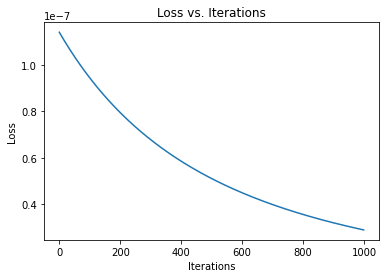

In [2]:
import math
import random
import matplotlib.pyplot as plt

# ... (rest of the code remains the same until the gradient descent loop)

# Initialize lists to store loss values and iterations
loss_values = []
iterations = []

# Perform gradient descent
A = A_init
B = B_init
C = C_init

for epoch in range(epochs):
    total_loss = 0
    for x in x_data:
        L, y, u, v, z, w = forward_propagation([x], A, B, C)
        dL_dA, dL_dB, dL_dC = backward_propagation([x], A, B, C, y, u, v, z, w)
        gradient_descent(A, B, C, dL_dA, dL_dB, dL_dC, learning_rate)
        total_loss += L

    # Log the loss and iteration
    loss_values.append(total_loss)
    iterations.append(epoch)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss}")

# Plot loss values vs. iterations
plt.plot(iterations, loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

# # Print the optimized A, B, and C matrices
# print("Optimized A:")
# print(A)
# print("Optimized B:")
# print(B)
# print("Optimized C:")
# print(C)
